# Fitting a Triple axis scan with LMFIT

The ! allows you to run a system command from the command line.  Let's use ls to see what is in the Data/Fitting directory.

In [1]:
!ls Data/Fitting

HB1_exp0762_scan0072.dat


Let's use the system command cat to see what is in the file

In [2]:
!cat Data/Fitting/HB1_exp0762_scan0072.dat

It is always good practice to import your libraries at the top of the file.  

In [3]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model

Now load the dats using the genfrom txt command.  Let's copy and paste the header names

In [4]:
# see https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.genfromtxt.html

headers = "    Pt.          h          k          l          e     time_1 detector_1  monitor_1      mcu_1     time_2 detector_2  monitor_2      mcu_2 focal_length         m1         m2       marc     mtrans     mfocus     fguide     hguide     vguide    tbguide     aguide     bguide     cguide         s1         s2        sgl        sgu        stl        stu   slita_bt   slita_lf   slita_rt   slita_tp         a1         a2          q         ei         ef    coldtip    tsample     temp_a"
# Note that by default, any consecutive whitespaces act as delimiter. 
data = np.genfromtxt('Data/Fitting/HB1_exp0762_scan0072.dat', names=headers.split())
data

array([( 1., -0.0004, 0.9701, -0., -0.0069, 15.018,  40., 22501., 15.001, 14.922,  125., 22501., 15.001, 7.9186, -43.1188, 41.9676, -0.255, 0., 290.0035, 3.0057, 1.7788, 1.0521, 0.0035, -3.9734, -0.1441, 18.1998, -32.8645, -33.1114, -1.7, 0.6045, 6.001, 0., 15., 15., 15., 15., 20.9835, 41.9564, 1.4548, 13.5001, 13.5071, 4.3153, 5.2692, 0.),
       ( 2., -0.0004, 0.9727, -0., -0.0069, 14.842,  54., 22501., 15.001, 15.107,  141., 22501., 15.001, 7.9186, -43.1188, 41.9676, -0.255, 0., 290.0035, 3.0057, 1.7788, 1.0521, 0.0035, -3.3216, -1.059 , 19.1998, -32.908 , -33.2036, -1.7, 0.6045, 6.001, 0., 15., 15., 15., 15., 20.9835, 41.9564, 1.4588, 13.5001, 13.5071, 4.302 , 5.1052, 0.),
       ( 3., -0.0004, 0.9751, -0., -0.0069, 14.951,  46., 22501., 15.001, 15.03 ,  150., 22501., 15.001, 7.9186, -43.1188, 41.9676, -0.255, 0., 290.0035, 3.0057, 1.7788, 1.0521, 0.0035, -3.3216, -1.059 , 19.2031, -32.9521, -33.287 , -1.7, 0.6045, 6.001, 0., 15., 15., 15., 15., 20.9835, 41.9564, 1.4623, 13.5001, 1

# Plotting

Note in the metadata the default columns to plot

```
# def_x = k
# def_y = detector_1
```

In [5]:

plt.rcParams["figure.figsize"] = (12,8)

Text(0.5,0,'$k (rlu)$')

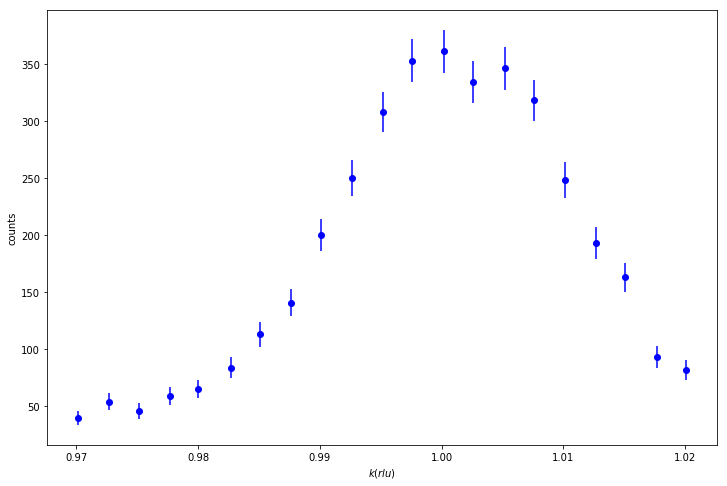

In [6]:
f,ax=plt.subplots()
data_x = data['k']
data_y = data['detector_1']
data_err=np.sqrt(data_y)
ax.errorbar(data_x, data_y,yerr=(data_err),fmt='bo')
ax.set_ylabel('counts')
ax.set_xlabel('$k (rlu)$')

# Fitting


For fitting we will use the LMFIT package.

First we define a fuction.
Note the Python Syntax is

```def <function name> (<params>):
    '''
    <documentation string>
    '''
    <code>
    return <value>```

In [7]:
def gaussian_slope(x, A, center, fwhm, m, b):
    '''
    Gaussian with fwhm and a a linear background
    '''
    g=A * np.exp(-4 * np.log(2) * (x - center)**2 / fwhm**2)
    return g+m*x+b

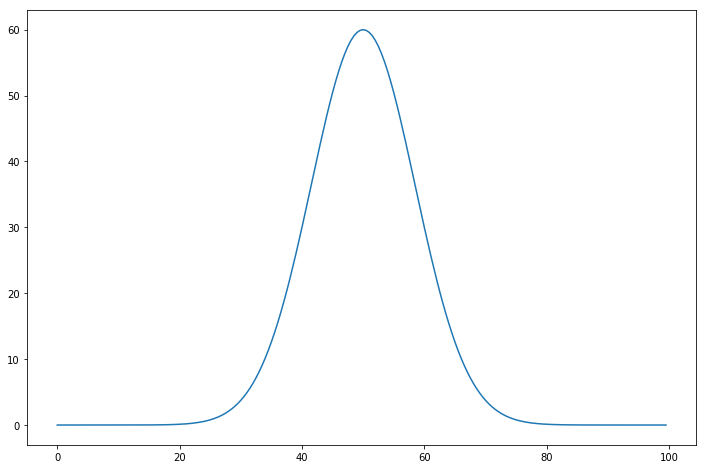

In [8]:
# Let's plot this function to see what it looks like
x = np.arange(0, 100, 0.5) # From 0 to 100 with 0.5 step
y = gaussian_slope(x, 60, 50, 20,0,0)
plt.plot(x,y)

## LMFit

Non-Linear Least-Squares Minimization and Curve-Fitting

Very powerful that has many options. 

We will do a simple gaussian fit.

See: See: https://lmfit.github.io

First we need to declare the Model.  By Declaring the Model LMFIT does some nice things for us.

1) it assumes the first parameter is the independent variable

2) it assumes the rest of the parameters are parameters and it takes care of keeping track of the parameter names

In [9]:

gmodel = Model(gaussian_slope)

type gmodel. ```<tab>``` to see what methods are available on gmodel

In [10]:
gmodel.

SyntaxError: invalid syntax (<ipython-input-10-15075805e989>, line 1)

In [11]:
# Nice things
print(gmodel.param_names)
print(gmodel.independent_vars)

['A', 'center', 'fwhm', 'm', 'b']
['x']


To do the fit use the gmodel.fit method.  press ```<shift>+<tab>``` when the cursor is inside the parenthesis to see more info. Since we have weights, we will use them. Return the results of the fit into result

In [12]:
# Fitting
result = gmodel.fit(data_y, x=data_x, A=3500, center=1, fwhm=0.02,m=0,b=50,weights=1./(data_err)**2)


type result. ```<tab>``` to see the methods available for the results. A nice overview is given if you print(result.fit_report())

In [ ]:
result.

In [13]:
print(result.fit_report())

[[Model]]
    Model(gaussian_slope)
[[Fit Statistics]]
    # function evals   = 33
    # data points      = 21
    # variables        = 5
    chi-square         = 0.093
    reduced chi-square = 0.006
    Akaike info crit   = -103.900
    Bayesian info crit = -98.678
[[Variables]]
    A:        328.176419 +/- 12.15983 (3.71%) (init= 3500)
    center:   1.00136944 +/- 0.000367 (0.04%) (init= 1)
    fwhm:     0.02187793 +/- 0.000988 (4.52%) (init= 0.02)
    m:       -160.019946 +/- 294.7933 (184.22%) (init= 0)
    b:        198.346762 +/- 285.9407 (144.16%) (init= 50)
[[Correlations]] (unreported correlations are <  0.100)
    C(m, b)                      = -1.000 
    C(fwhm, m)                   = -0.853 
    C(fwhm, b)                   =  0.851 
    C(center, b)                 =  0.836 
    C(center, m)                 = -0.835 
    C(center, fwhm)              =  0.712 
    C(A, b)                      =  0.469 
    C(A, m)                      = -0.469 
    C(A, center)            

Now let's make a plot of the fit results, the data and the difference curve.
This time subplot will produce an axis handle that is an array of two items one for data and the fit and one for the residuals.

Text(0.5,0,'$k (rlu)$')

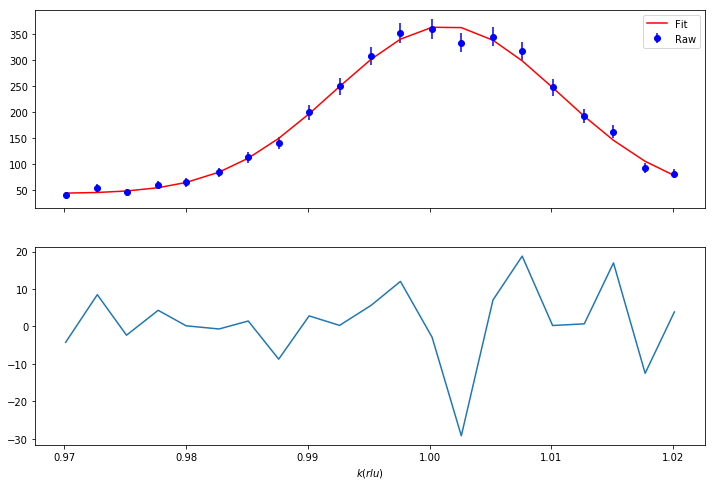

In [14]:
f2,ax2=plt.subplots(nrows=2,ncols=1,sharex=True)
ax2[0].errorbar(data_x,data_y,yerr=data_err,fmt='bo',label="Raw")
ax2[0].plot(data_x, result.best_fit, 'r-',label="Fit")
ax2[0].legend()
#ax2[1].plot(data_x,result.residual)
ax2[1].plot(data_x,data_y-result.best_fit)
ax2[1].set_xlabel('$k (rlu)$')

In [15]:
ax2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117d155c0>,
      dtype=object)

To save my nice figure I use.

In [16]:
f2.savefig('test.pdf')